## Visión por Computadora 1

## Trabajo Práctico N° 1

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |
| Juan José Cardinali   | juanchijc@gmail.com       | a1809   |

#### LIBRERÍAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

### PARTE 1:

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2. Implementar el algoritmo de White Patch para librarnos de las diferencias de color de iluminación.

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White Patch.

In [2]:
class img_pro():
    def __init__(self):
        self.img = None

    def read_img(self, img_path):
        self.img = cv.imread(img_path)

    def chromatic_coord(self):
        # Convierte la imagen a punto flotante
        img_float = self.img.astype(np.float32)

        # Normaliza canals
        norm_factor = np.sum(img_float, axis=2)

        # Avoid dividing by zero...
        norm_factor[norm_factor == 0] = 1

        img_norm = img_float / norm_factor[:, :, np.newaxis]

        # Re-escale image between [0, 255] using white-patch
        # # Calcula el factor de escala
        max_R = np.max(img_norm[:,:,2])
        max_G = np.max(img_norm[:,:,1])
        max_B = np.max(img_norm[:,:,0])
        
        # # Aplica el ajuste del balance de blancos (White Patch)
        img_norm[:,:,2] = (img_norm[:,:,2] / max_R) * 255
        img_norm[:,:,1] = (img_norm[:,:,1] / max_G) * 255
        img_norm[:,:,0] = (img_norm[:,:,0] / max_B) * 255
        
        # Convierte la imagen de vuelta a valores enteros
        img_chromatic = np.clip(img_norm, 0, 255).astype(np.uint8)

        return img_chromatic

    def white_patch(self):
        # Convierte la imagen a punto flotante
        img_float = self.img.astype(np.float32)
        
        # Calcula el factor de escala
        max_R = np.max(img_float[:,:,2])
        max_G = np.max(img_float[:,:,1])
        max_B = np.max(img_float[:,:,0])
        
        # Aplica el ajuste del balance de blancos (White Patch)
        img_float[:,:,2] = (img_float[:,:,2] / max_R) * 255
        img_float[:,:,1] = (img_float[:,:,1] / max_G) * 255
        img_float[:,:,0] = (img_float[:,:,0] / max_B) * 255
        
        # Convierte la imagen de vuelta a valores enteros
        img_white_patch = np.clip(img_float, 0, 255).astype(np.uint8)
        
        return img_white_patch
    
    

Aplicamos el algoritmo de coordenadas cromáticas:

In [6]:
# Definimos la lista de archivos a leer
imgs_to_read = []
for i in range(3):
    imgs_to_read.append('coord_cromaticas/CoordCrom_'+str(i+1)+'.png')

TypeError: Image data of dtype object cannot be converted to float

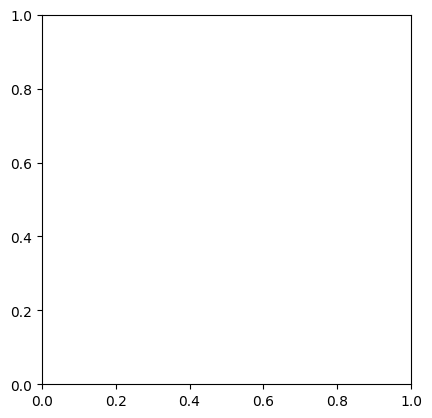

In [ ]:
for img_path in imgs_to_read:

    img = img_pro()
    img.read_img(img_path)
    img_chromatic = img.chromatic_coord()

    # # Muestro la imagen con matplotlib
    # fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # plt.sca(axes[0])  # Seleccionar el primer eje
    plt.figure()
    plt.imshow(img)
    plt.title("Original image")
    
    # plt.sca(axes[1])  # Seleccionar el primer eje
    plt.figure()
    plt.imshow(img_chromatic)
    plt.title("Chromatic image")

    plt.show()

Aplicamos el algoritmo de White Patch:

In [13]:
imgs_to_read = ['test_blue.png',
                'test_green.png',
                'test_red',
                'wp_blue',
                'wp_green',
                'wp_green2',
                'wp_red',
                'wp_red2',
                ]

In [ ]:
for img_path in imgs_to_read:

    img = img_pro()
    img.read_img(img_path)
    img_whitepatch = img.white_patch()

    # Muestro la imagen con matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # plt.sca(axes[0])  # Seleccionar el primer eje
    plt.figure()
    plt.imshow(img)
    plt.title("Original image")
    
    # plt.sca(axes[1])  # Seleccionar el primer eje
    plt.figure()
    plt.imshow(img_whitepatch)
    plt.title("White Patch image")

    plt.show()

### PARTE 2:

1. Para las imágenes img1_tp.png' y img2_tp.png, leerlas con OpenCV en escala de grisas y visualizarlas.

2. Elija un número de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasficicación/detección de imágenes, considera que puede ser de utilidad tomar como *feature* a los histogramas?

3. Para la imagen segmentacion.png, analice el histograma de los canales RGB. Segmente alguno de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes separadas.

In [14]:
imgs_to_read = ['img1_tp.png',
                'img2_tp.png',
                ]

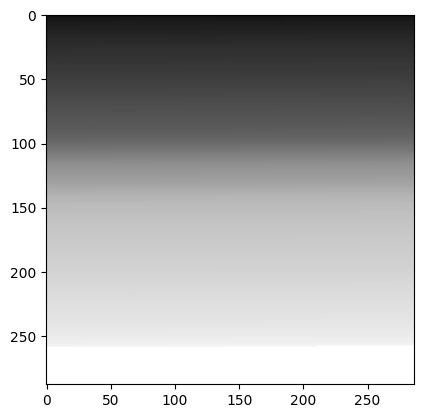

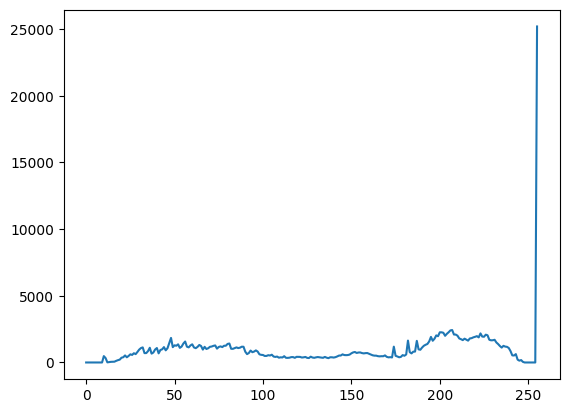

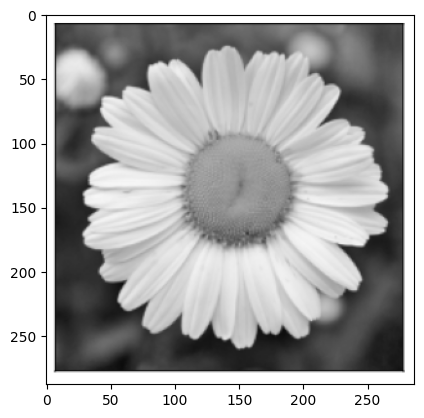

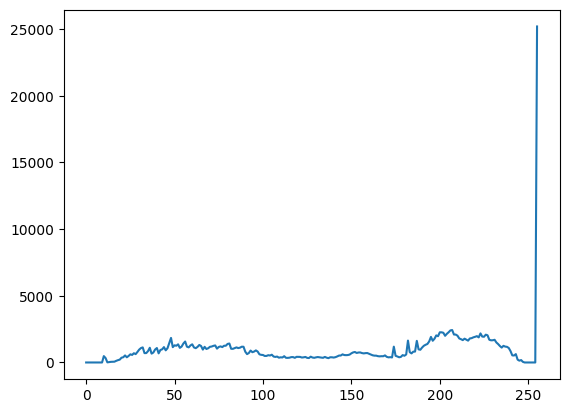

In [26]:
for img_file in imgs_to_read:
    img = cv.imread(img_file)
    plt.imshow(img, cmap='gray')
    plt.show()

    hist, bins = np.histogram(img.ravel(), 256, [0, 256])
    plt.plot(hist)
    plt.show()

#### SEGMENTACIÓN

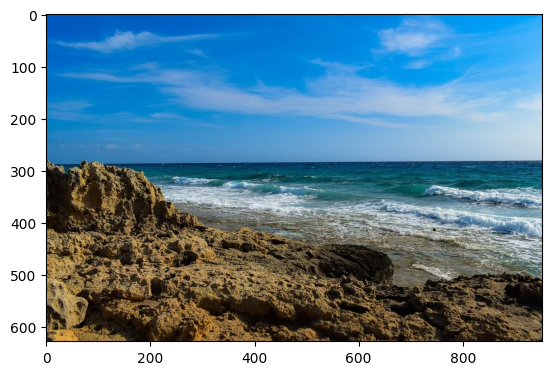

In [14]:
imgBGR = cv.imread('segmentacion.png')

# Convertir la imagen a RGB
imgRGB = cv.cvtColor(imgBGR, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(imgRGB)
plt.show()

In [ ]:
# Analizamos los histogramas de los canales de la imagen RGB



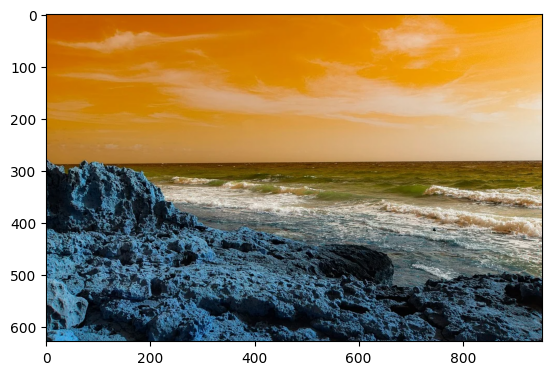

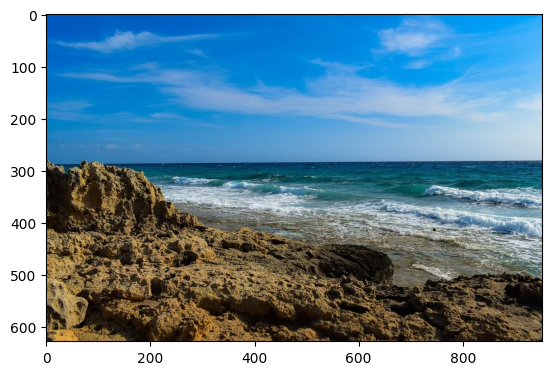

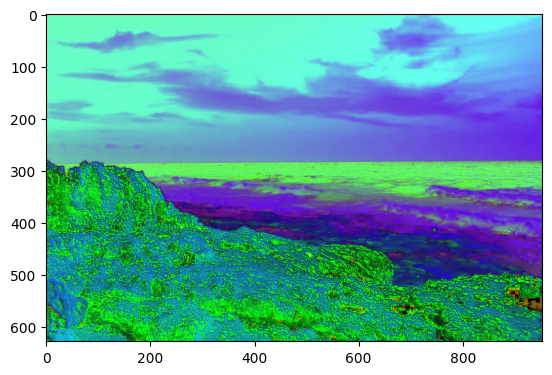

In [ ]:
# Para segmentar, buscamos un espacio de color conveniente para la discriminación

# Convertir la imagen a RGB
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(imgRGB)
plt.show()

# Convertir la imagen a HSV
imgHSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
plt.figure()
plt.imshow(imgHSV)
plt.show()

In [ ]:


# Graficar los perfiles de intensidad de cada canal
plt.figure()
idx_col = 350
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
im_h, im_s, im_v = cv.split(imgHSV)
plt.figure()
# La curva de Hue, discrimina fácilmente el color del tablero de los colores del fondo
plt.imshow(im_h, cmap='gray')
plt.show()
plt.figure()
# Puedo complementar con la curva de saturación, ya que ambas son muy uniformes sobre el tablero
plt.imshow(im_s,cmap='gray')
plt.show()
plt.figure()
# La imagen de int}ensidad (V) permite discriminar fácilmente el bloque del tablero, pero confunde el tablero con el fondo
plt.imshow(im_v,cmap='gray')
plt.show()

In [ ]:
# Hacemos una descripcion estadistica
muestra = imgHSV[300:350, 300:350, :]

color_h_medio, _, _ = np.mean(muestra, axis=(0,1))

muestra = cv.cvtColor(muestra, cv.COLOR_HSV2BGR)
#muestra = cv.cvtColor(muestra, cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(muestra)
plt.show()

In [ ]:
color_h_medio

In [ ]:
print(f'hue medio:{color_h_medio}')

color_l = (color_h_medio-10, 10, 10)
color_u = (color_h_medio+10, 150, 150)

mask = cv.inRange(imgHSV, color_l,  color_u)


plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()

In [ ]:
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()